In [14]:
import os
import pandas as pd

base_dir = '../data_processed'
all_data = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            path = os.path.join(root, file)
            df = pd.read_csv(path)
            df['variant'] = os.path.basename(root)  #  añadir columna con el nombre de la variante
            all_data.append(df)

# Concatenar todos los DataFrames
df_all = pd.concat(all_data, ignore_index=True)


In [15]:
df_all['congestion_event'] = (df_all['cwnd'].diff().shift(-1) < -10).astype(int)
df_all.dropna(inplace=True)


In [ ]:
features = ['cwnd', 'rtt', 'bytes_retrans', 'throughput', 'packets_lost']
df_all = df_all.dropna(subset=features + ['congestion_event'])

X = df_all[features]
y = df_all['congestion_event']

print(f"Cantidad de registros: {df_all.shape[0]}")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


c:\Users\ian\Desktop\fing\tesis\Machine-Learning-CC\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Threshold óptimo (max F1-score): 0.27

 Reporte de clasificación (threshold ajustado):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    604279
           1       0.55      0.61      0.58     12954

    accuracy                           0.98    617233
   macro avg       0.77      0.80      0.79    617233
weighted avg       0.98      0.98      0.98    617233



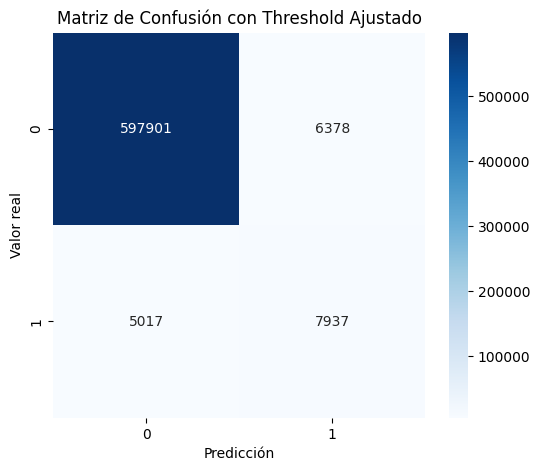

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import sys
sys.path.append('../scripts')
from evaluation_utils import evaluate_with_optimal_threshold

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluar y ajustar threshold automáticamente
y_pred_adjusted, best_threshold = evaluate_with_optimal_threshold(model, X_test_scaled, y_test)



In [18]:
df_all['variant_code'] = df_all['variant'].astype('category').cat.codes
features.append('variant_code')
